### HopfieldNetwork
TODO
+ Test 
+ Commentaries
+ Energetic landscape of network
+ Better trajectory plot
+ Different types of activation functions

In [11]:
%matplotlib inline
import numpy as np
import networkx as nx
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sys
plt.rcParams["figure.figsize"] = (12,12)

Hopfield network in matrix notation

In [ ]:
N = 1024
p = 1
patterns = np.random.randint(2,size =(N,p))
patterns = 2*(patterns-0.5)
test = np.random.randint(2,size=(1,N))
test = 2*(test-0.5)

In [ ]:
sns.heatmap(patterns[:,0].reshape(32,32))


In [ ]:
sns.heatmap(patterns[:,0].reshape(32,32))


In [ ]:
connection_matrix = np.zeros([N,N])
for ii in range(N):
    for jj in range(N):
        connection_matrix[ii,jj] = (patterns[ii,:] * patterns[jj,:]).sum()
connection_matrix = connection_matrix/N

In [ ]:
result = np.sign(np.dot(test,connection_matrix))

In [ ]:
for ii in range(p):
    print('paterrn missmatchs',ii,(np.abs(patterns[:,ii]-result)).sum())


### Graph representation

In [12]:
def progress(count, total, suffix=''):
    bar_len = 60
    filled_len = int(round(bar_len * count / float(total)))

    percents = round(100.0 * count / float(total), 1)
    bar = '=' * filled_len + '-' * (bar_len - filled_len)

    sys.stdout.write('[%s] %s%s ...%s\r' % (bar, percents, '%', suffix))
    sys.stdout.flush()

In [13]:
def networkInit(N = 128,net_type='complete',p=0.5,k=5):
    
    if net_type == 'complete':
        neural_net = nx.complete_graph(N)
        
    if net_type == 'random':
        neural_net = nx.erdos_renyi_graph(N,p)
        
    if net_type == 'small-world':
        neural_net = nx.watts_strogatz_graph(N,k,p)
        
    net_state = ((np.random.randint(0,2,N) - 0.5)*2).astype(int)
    nodes_state_dict = dict(zip(list(range(N)),net_state))
    nx.set_node_attributes(neural_net,'state',nodes_state_dict)

    edges_list = list(nx.edge_betweenness_centrality(neural_net, normalized=False).keys()) 
    edges_weigts =   (np.random.rand(len(edges_list))-0.5)
    edges_weigts_dict = dict(zip(edges_list,edges_weigts))
    nx.set_edge_attributes(neural_net,'weigth',edges_weigts_dict)

    return neural_net

In [14]:
def simpleNeuron(neural_net,ii):
    input_list = []
    for jj in neural_net.edge[ii].keys():
        input_list.append(neural_net.edge[ii][jj]['weigth'] * neural_net.node[jj]['state'])
    new_value = np.sign(np.sum(input_list))
    if new_value == 0:
        new_value = 1

    return new_value

def memoryNeuron(neural_net,ii,kk,network_states,r,k):
    input_list = []
    for jj in neural_net.edge[ii].keys():
        tmp_value = (neural_net.edge[ii][jj]['weigth'] * neural_net.node[jj]['state'])
        memory_value = 0
        if kk>r:
            for hh in range(r):
                memory_value = memory_value + (k**(hh+1)) * network_states[(kk-hh),ii]
            
        input_list.append(tmp_value - memory_value)
        new_value = np.sign(np.sum(input_list))
        if new_value == 0:
            new_value = 1

    return new_value

In [15]:
def networkEvolution(neural_net, iterations = 100, evolution_dynamics = 'synchronous',
                     neuron_dynamics = 'simple',k=0, r=0):
    
    N = len(neural_net.nodes())
    network_states = np.zeros([iterations,N])
    
    for ii in range(iterations):
        
        new_state_dict = {}
                        
        if evolution_dynamics == 'synchronous':
            iter_dict_dynamics = list(neural_net.node.keys())

        if evolution_dynamics == 'asynchronous':
            iter_dict_dynamics = np.random.choice(list(neural_net.node.keys()),len(neural_net.node))
        
        for jj in iter_dict_dynamics:
            
            if neuron_dynamics == 'simple':
                new_state_dict[jj] = simpleNeuron(neural_net,jj)
            
            if neuron_dynamics == 'with memory':
                new_state_dict[jj] = memoryNeuron(neural_net,jj,ii,network_states,r,k)

            if evolution_dynamics == 'asynchronous':
                nx.set_node_attributes(neural_net,'state',new_state_dict)
                new_state_dict = {}            
                new_state = []
                for ll in range(N):
                    new_state.append(neural_net.node[ll]['state'])

                if not(ii%1):progress(ii,iterations)

                nx.set_node_attributes(neural_net,'state',new_state_dict)
                network_states[ii,:]  = new_state 
        
        nx.set_node_attributes(neural_net,'state',new_state_dict)
        new_state_dict = {}            
        new_state = []
        for ll in range(N):
            new_state.append(neural_net.node[ll]['state'])

        if not(ii%1):progress(ii,iterations)

        nx.set_node_attributes(neural_net,'state',new_state_dict)
        network_states[ii,:]  = new_state 
    return network_states

In [180]:
graph = networkInit(N = 128,net_type='small-world',p=0.05, k = 10)

/home/bklimowski/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/bklimowski/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/bklimowski/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/bklimowski/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.w

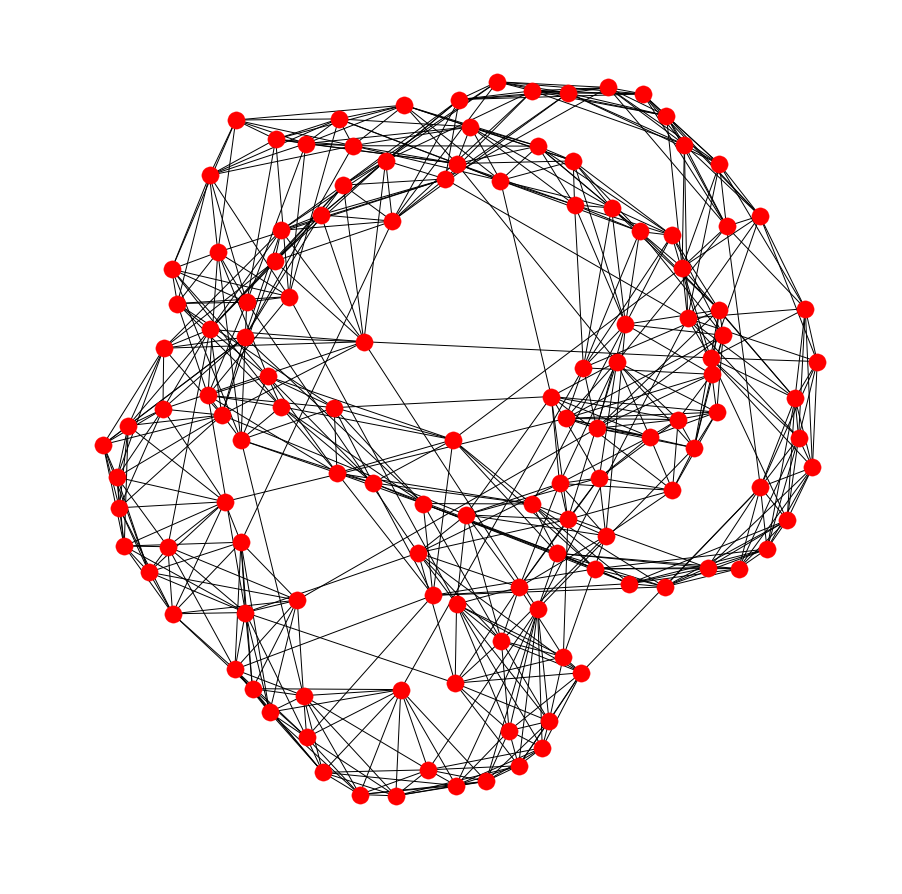

In [181]:
nx.draw(graph)

In [182]:
network_states =  networkEvolution(graph,200,evolution_dynamics='asynchronous',neuron_dynamics='with memory',k=100,r=6)

In [183]:
network_states = ((network_states + 1)/2).astype(int)

In [184]:
decimal_states = np.zeros([100,1])
for ii in range(100):
    decimal_states[ii,:]=int("".join(str(x) for x in network_states[ii,:].tolist()),2)

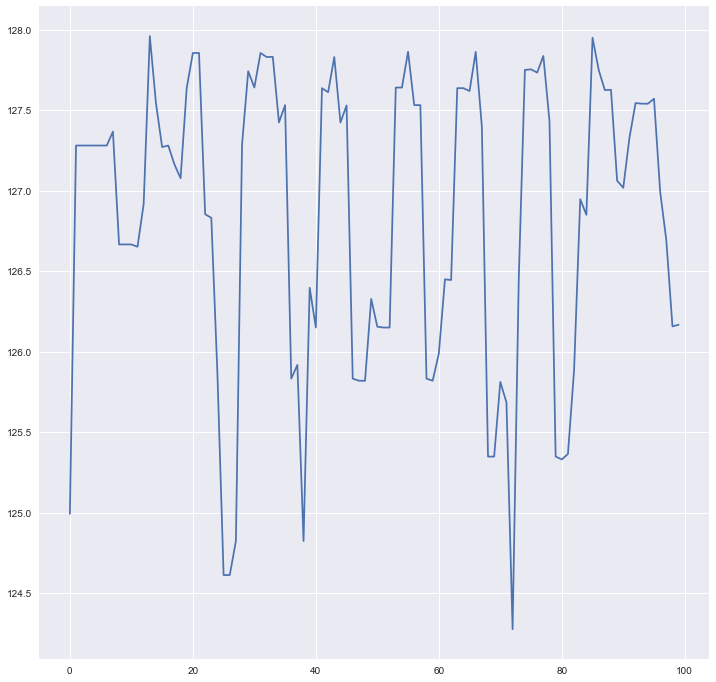

In [185]:
plt.plot(np.log2(decimal_states))

In [186]:
decimal_states1 = []
decimal_states2 = []
for ii in range(100):
    decimal_states1.append(int("".join(str(x) for x in network_states[ii,:int(128/2)].tolist()),2))
    decimal_states2.append(int("".join(str(x) for x in network_states[ii,int(128/2):].tolist()),2))

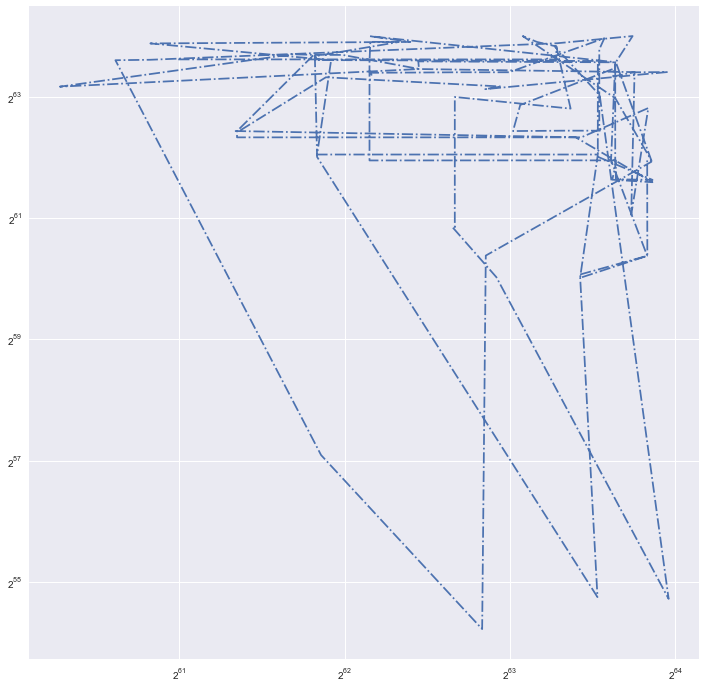

In [187]:
plt.loglog((decimal_states1),(decimal_states2),'-.',basex=2,basey=2)